In [1]:
import numpy as np
import pandas as pd
import json 
import requests 
import time 
import pubchempy as pcp
data=pd.read_excel(r'C:\Users\Zhouhaifan\Desktop\Amide_rate_traindata.xlsx')
print(data)
CAS_number=data['CAS_NUMBER']
print(CAS_number)

cas1=CAS_number[1][1:-1]
print(cas1)
results = pcp.get_compounds(cas1, 'name')
print(results)
print(results[0].isomeric_smiles)

def get_smile(cas):
    cid=pcp.get_compounds(cas, 'name')
    smile=cid[0].isomeric_smiles
    return smile

smile_list=[]
for i in CAS_number:
    print(i)
    cas=i[1:-1]
    smile=get_smile(cas)
    smile_list.append(smile)

data['smile']=smile_list
import pickle
f = open('data1.pckl', 'wb')
pickle.dump(data, f)
f.close()

                   英文名称         CAS号  实验值logK     CAS_NUMBER
0          flufenoxuron  101463-69-8   -1.724  '101463-69-8'
1         diflubenzuron   35367-38-5   -1.563   '35367-38-5'
2            famoxadone  131807-57-3    1.031  '131807-57-3'
3             oxadiazon   19666-30-9   -1.740   '19666-30-9'
4           flumioxazin  103361-09-7    1.841  '103361-09-7'
..                  ...          ...      ...            ...
88    tribenuron-methyl  101200-48-0    1.461  '101200-48-0'
89  chlorantraniliprole  500008-45-7   -1.161  '500008-45-7'
90            cefoxitin   35607-66-0   -0.979   '35607-66-0'
91           ccphradinc   38821-53-3   -0.983   '38821-53-3'
92          propicillin     551-27-9   -0.777     '551-27-9'

[93 rows x 4 columns]
0     '101463-69-8'
1      '35367-38-5'
2     '131807-57-3'
3      '19666-30-9'
4     '103361-09-7'
          ...      
88    '101200-48-0'
89    '500008-45-7'
90     '35607-66-0'
91     '38821-53-3'
92       '551-27-9'
Name: CAS_NUMBER, Length:

In [2]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.EState import Fingerprinter
from rdkit.Chem import MACCSkeys
m1 = Chem.MolFromSmiles('C1=CC(=C(C(=C1)F)C(=O)NC(=O)NC2=CC=C(C=C2)Cl)F')
ecfp4_mg =MACCSkeys.GenMACCSKeys(m1)
print(ecfp4_mg)
print(len(ecfp4_mg))
print(ecfp4_mg.ToBitString())

167
00000000000000000000000000000000000001000011000000000000000000000000000000000100000000010100100001000001001100100000010000000100000101111000001011000011001010110111110


In [3]:
f = open('data1.pckl', 'rb')
data1 = pickle.load(f)
print(data1)
f.close()
fingerprint_list=[]
for j in data1['smile']:
    j1= Chem.MolFromSmiles(j)
    MACCS_fingerprint = MACCSkeys.GenMACCSKeys(j1)
    fingerprint_list.append(MACCS_fingerprint.ToBitString())
data1['MACCS_fingerprint']=fingerprint_list
    

                   英文名称         CAS号  实验值logK     CAS_NUMBER  \
0          flufenoxuron  101463-69-8   -1.724  '101463-69-8'   
1         diflubenzuron   35367-38-5   -1.563   '35367-38-5'   
2            famoxadone  131807-57-3    1.031  '131807-57-3'   
3             oxadiazon   19666-30-9   -1.740   '19666-30-9'   
4           flumioxazin  103361-09-7    1.841  '103361-09-7'   
..                  ...          ...      ...            ...   
88    tribenuron-methyl  101200-48-0    1.461  '101200-48-0'   
89  chlorantraniliprole  500008-45-7   -1.161  '500008-45-7'   
90            cefoxitin   35607-66-0   -0.979   '35607-66-0'   
91           ccphradinc   38821-53-3   -0.983   '38821-53-3'   
92          propicillin     551-27-9   -0.777     '551-27-9'   

                                                smile  
0   C1=CC(=C(C(=C1)F)C(=O)NC(=O)NC2=C(C=C(C=C2)OC3...  
1      C1=CC(=C(C(=C1)F)C(=O)NC(=O)NC2=CC=C(C=C2)Cl)F  
2   CC1(C(=O)N(C(=O)O1)NC2=CC=CC=C2)C3=CC=C(C=C3)O...  
3   CC(

In [4]:
#str to int
def trans_str_to_int(fingerprint_str):
    int_list=[]
    for ii in fingerprint_str:
        ii=int(ii)
        int_list.append(ii)
    return int_list
MACCS_fingerprint_list=[]
for s in data1['MACCS_fingerprint']:
    s1=trans_str_to_int(s)
    MACCS_fingerprint_list.append(s1)
data1['MACCS_fingerprint_int']=MACCS_fingerprint_list

In [5]:
data1

,英文名称,CAS号,实验值logK,CAS_NUMBER,smile,MACCS_fingerprint,MACCS_fingerprint_int
0,flufenoxuron,101463-69-8,-1.724,'101463-69-8',C1=CC(=C(C(=C1)F)C(=O)NC(=O)NC2=C(C=C(C=C2)OC3...,0000000000000000000000000000000000000100001100...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,diflubenzuron,35367-38-5,-1.563,'35367-38-5',C1=CC(=C(C(=C1)F)C(=O)NC(=O)NC2=CC=C(C=C2)Cl)F,0000000000000000000000000000000000000100001100...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,famoxadone,131807-57-3,1.031,'131807-57-3',CC1(C(=O)N(C(=O)O1)NC2=CC=CC=C2)C3=CC=C(C=C3)O...,0000000000000000000000010000000000000000000000...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,oxadiazon,19666-30-9,-1.740,'19666-30-9',CC(C)OC1=C(C=C(C(=C1)N2C(=O)OC(=N2)C(C)(C)C)Cl)Cl,0000000000000000000000010000000000000000000000...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,flumioxazin,103361-09-7,1.841,'103361-09-7',C#CCN1C(=O)COC2=CC(=C(C=C21)N3C(=O)C4=C(C3=O)C...,0000000000000000010000000010000000000000001000...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...
88,tribenuron-methyl,101200-48-0,1.461,'101200-48-0',CC1=NC(=NC(=N1)OC)N(C)C(=O)NS(=O)(=O)C2=CC=CC=...,0000000000000000000000000100000011000110000000...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
89,chlorantraniliprole,500008-45-7,-1.161,'500008-45-7',CC1=CC(=CC(=C1NC(=O)C2=CC(=NN2C3=C(C=CC=N3)Cl)...,0000000000000000000000000000000000000010000000...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
90,cefoxitin,35607-66-0,-0.979,'35607-66-0',CO[C@@]1([C@@H]2N(C1=O)C(=C(CS2)COC(=O)N)C(=O)...,0000000010010000000000010000000000001000000001...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ..."
91,ccphradinc,38821-53-3,-0.983,'38821-53-3',CC1=C(N2[C@@H]([C@@H](C2=O)NC(=O)[C@@H](C3=CCC...,0000000010010000000000000000000000001000000001...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ..."


In [6]:
train_data=data1[0:74]
test_data=data1[74:93]

In [7]:
X_init=[]
for n in data1['MACCS_fingerprint_int']:
    X_init.append(n)
X_init=np.array(X_init)
print(np.shape(X_init))

(93, 167)


In [8]:
from sklearn.decomposition import PCA
pca = PCA()
pca = pca.fit(X_init)
 
cumsum_ratio = list(np.cumsum(pca.explained_variance_ratio_))
alpha = 0.9  
 
# 寻找出最优的降维的维度数，i为最优的维度数
for i, j in enumerate(cumsum_ratio):
    if j > alpha:
        break
print('the best pca n_components is', i)


the best pca n_components is 24


In [9]:
pca=PCA(24)
pca.fit(X_init)
X_pca=pca.transform(X_init)
print(np.shape(X_pca))

(93, 24)


In [10]:
X_train=X_pca[0:74]
X_test=X_pca[74:93]
y_train=train_data['实验值logK']
y_test=test_data['实验值logK']

In [11]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
model = xgb.XGBRegressor(max_depth=4,learning_rate=0.1,n_estimators=80,randam_state=1,alpha =10,colsample_bytree = 0.3)
model.fit(X_train,y_train)
test_predict=model.predict(X_test)
train_predict = model.predict(X_train)
msetest=mean_squared_error(y_test,test_predict)
msetrain=mean_squared_error(y_train,train_predict)
print(msetest)
print(msetrain)

[09:25:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "randam_state" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


1.0313367015167854
0.8053290197351889


In [12]:
train_predict

array([-1.2693204 , -0.97148204,  0.5056208 , -1.1191287 ,  0.66536164,
       -0.75795317, -1.24672   , -1.8903198 , -0.3754684 ,  0.46415994,
       -0.18611974, -0.7702882 , -1.2745296 , -0.41076255, -1.7952869 ,
       -1.7252561 , -0.5485746 , -0.9827266 , -0.2500654 , -1.2693204 ,
       -0.97148204, -1.5263056 , -0.94266766,  0.4395549 , -1.3153259 ,
       -1.5229213 ,  0.6510999 , -1.2760562 ,  0.8003358 , -1.8680924 ,
        0.09834629, -0.09587964, -1.861211  , -1.4005626 , -1.884365  ,
       -1.5280904 , -1.2020679 , -1.1976613 , -1.2693204 , -0.15475835,
        0.09834629, -0.1881273 , -1.5810848 , -1.7021997 , -1.2599446 ,
       -1.861211  , -2.0183697 , -0.97148204,  0.0150167 ,  0.29007068,
       -1.2794507 , -1.8884587 , -1.4952394 , -0.38147873, -1.2193663 ,
       -0.43143874, -0.93957424, -0.49117997,  0.62494045, -0.29309487,
        0.6527232 , -1.3769338 , -1.4408696 ,  0.3568118 ,  0.5193078 ,
       -0.55173725, -1.0689379 , -1.2574581 ,  0.7493889 , -1.15

In [13]:
test_predict

array([-1.2693204 , -0.11985793, -1.2574581 , -0.1802517 ,  0.12646413,
       -1.5500665 , -1.2014292 , -0.81388646, -1.8554871 , -0.8445341 ,
       -0.22386399, -0.37197784, -0.13920611, -1.8884587 , -0.6497083 ,
       -0.37120342, -0.771587  , -0.9962896 , -0.68748295], dtype=float32)

In [14]:
linear_predict=[-1.871,
-0.196,
-1.025,
0.520 ,
-1.078,
-2.815,
-1.246,
-1.626,
-2.435,
-1.340,
-1.959,
-1.651,
-1.167,
-0.937,
-1.838,
0.608, 
-0.754,
-0.870,
-1.096]
linear_predict=np.array(linear_predict)
mse_linear_test=mean_squared_error(y_test,linear_predict)
print(mse_linear_test)

2.164556894736842


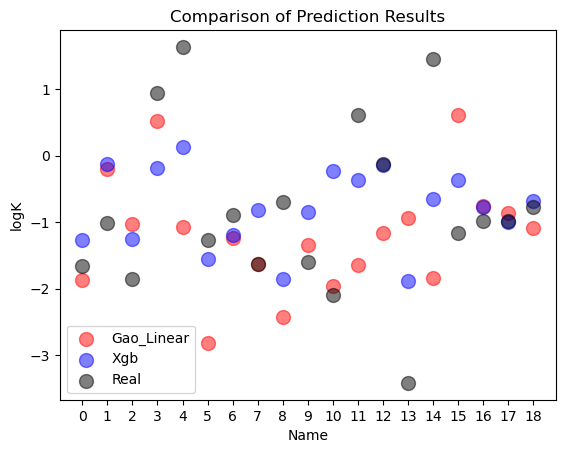

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

x = np.arange(0,19)
#x=data1['英文名称'][74:93]
y1 = linear_predict
y2 = test_predict
y3 = y_test
plt.scatter(x, y1,s=100,c='red',alpha=0.5,cmap='viridis',label='Gao_Linear')  
plt.scatter(x, y2,s=100,c='blue',alpha=0.5,cmap='afmhot_r',label='Xgb') 
plt.scatter(x, y3,s=100,c='black',alpha=0.5,cmap='afmhot_r',label='Real')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title("Comparison of Prediction Results")
plt.xlabel("Name")
plt.ylabel("logK")
plt.legend()
plt.show()